In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 

In [142]:
df = pd.read_csv('./Pivots for FWFS & WOJ details Onshore  Assets.csv')
df.columns

## convert all dates to datetime object
from calendar import month_abbr
month_to_num = {'Jan': 1, 'Feb': 2, 'Mar': 3, 
                'Apr': 4, 'May': 5, 'Jun': 6, 'Jul': 7, 
                'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}

for i, date_str in enumerate(df['MONTH']):
    y = "20{}".format(date_str.split('-')[1])
    m = month_to_num[date_str.split('-')[0]]
    df['MONTH'][i] = pd.to_datetime("{}-{}".format(m, y), format='%m-%Y')


/var/folders/5l/tvrvl3dx17g9f755p61ffzs00000gp/T/ipykernel_41513/412209068.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MONTH'][i] = pd.to_datetime("{}-{}".format(m, y), format='%m-%Y')


<BarContainer object of 605 artists>

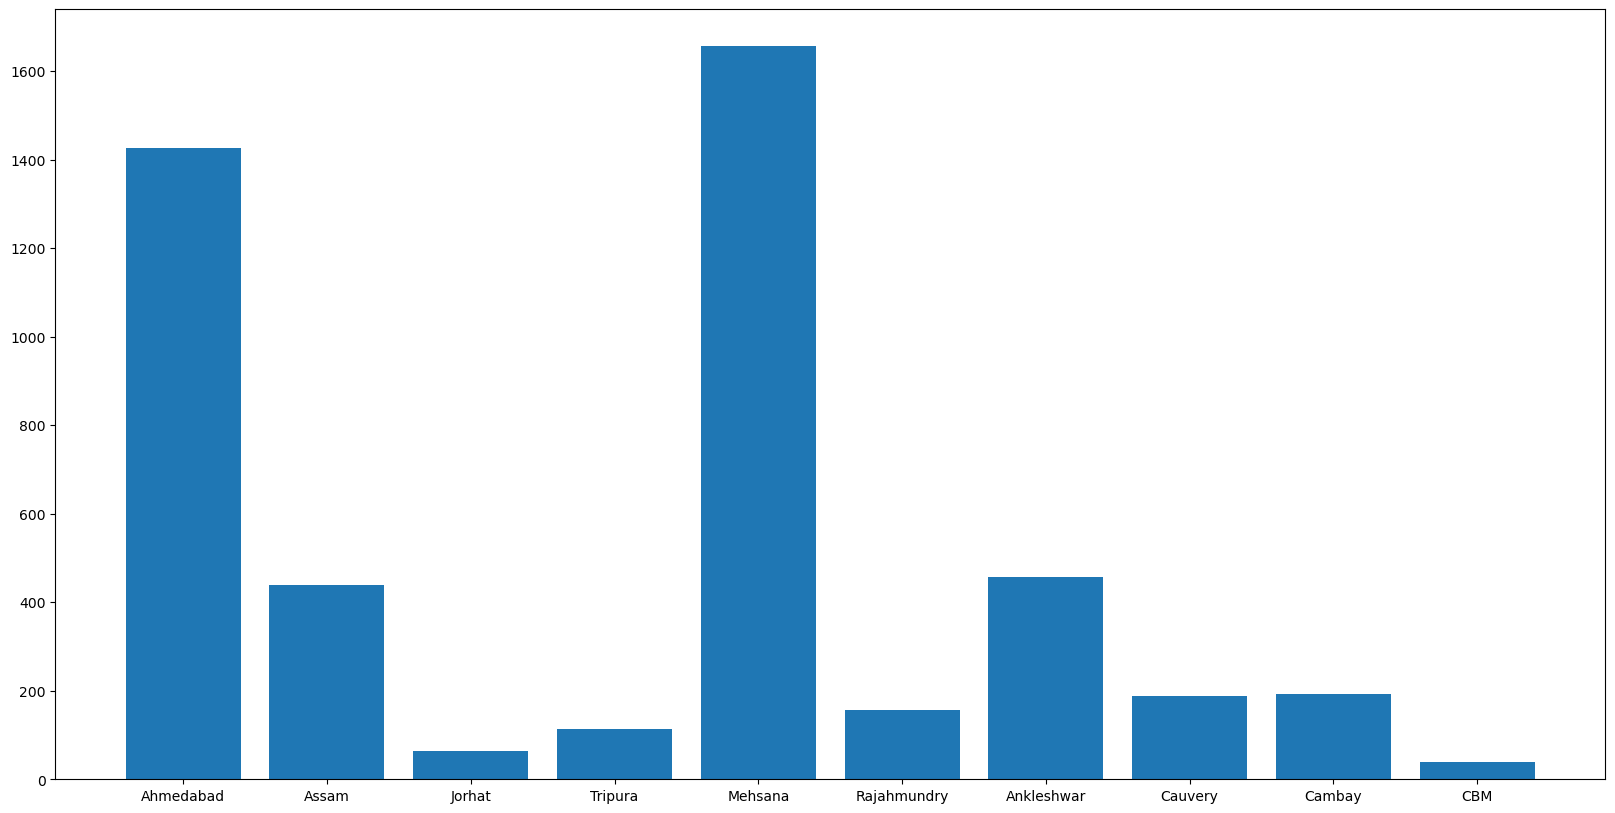

In [143]:
plt.figure(figsize=(20,10))
plt.bar(df['Asset'], df['Flowing Wells'] )

In [144]:
df['Asset'].count()
df.pivot_table(index = ['Asset'], aggfunc ='size')

Asset
Ahmedabad      62
Ankleshwar     62
Assam          62
CBM            47
Cambay         62
Cauvery        62
Jorhat         62
Mehsana        62
Rajahmundry    62
Tripura        62
dtype: int64

In [145]:
sub_df = df[['Asset', 'MONTH', 'Flowing Wells', 'CEASURE\n(Oil & Gas Wells)', 'WOJ in FWFS wells', 'Net Decrease/ Increase in Sick wells']]
# df.columns
sub_df.fillna(0)

Asset      MONTH  Flowing Wells  CEASURE\n(Oil & Gas Wells)  \
0      Ahmedabad 2018-04-01           1238                        30.0   
1      Ahmedabad 2018-05-01           1247                        28.0   
2      Ahmedabad 2018-06-01           1250                        37.0   
3      Ahmedabad 2018-07-01           1253                        29.0   
4      Ahmedabad 2018-08-01           1262                        27.0   
..           ...        ...            ...                         ...   
600       Jorhat 2023-05-01             62                         1.0   
601      Tripura 2023-05-01            104                         0.0   
602  Rajahmundry 2023-05-01            136                         3.0   
603      Cauvery 2023-05-01            176                         0.0   
604          CBM 2023-05-01             25                         0.0   

     WOJ in FWFS wells  Net Decrease/ Increase in Sick wells  
0                  0.0                                     2  
1                  0.0                                     2  
2                  0.0                                    -6  
3                  0.0                                    -2  
4                  0.0                                    11  
..                 ...                                   ...  
600                0.0                                    -1  
601                1.0                                     1  
602                0.0                                    -3  
603                2.0                                     4  
604                2.0                                     2  

[605 rows x 6 columns]

In [146]:
plt.figure(figsize=(20,10))
def plot(df, title):
    plt.plot(df['MONTH'], df['Flowing Wells'], label='Flowing Wells ({})'.format(title))
    plt.plot(df['MONTH'], df['Flowing Wells'] - df['CEASURE\n(Oil & Gas Wells)'], 
             label='Flowing Wells - Ceased Wells ({})'.format(title))
    # plt.plot(df['MONTH'], df['Net Decrease/ Increase in Sick wells'])
    plt.title("Overall Picture")I’m 
    plt.legend()
    
# for asset in sub_df['Asset'].unique():
#     plot(sub_df.loc[sub_df['Asset'] == asset], asset)

<Figure size 2000x1000 with 0 Axes>

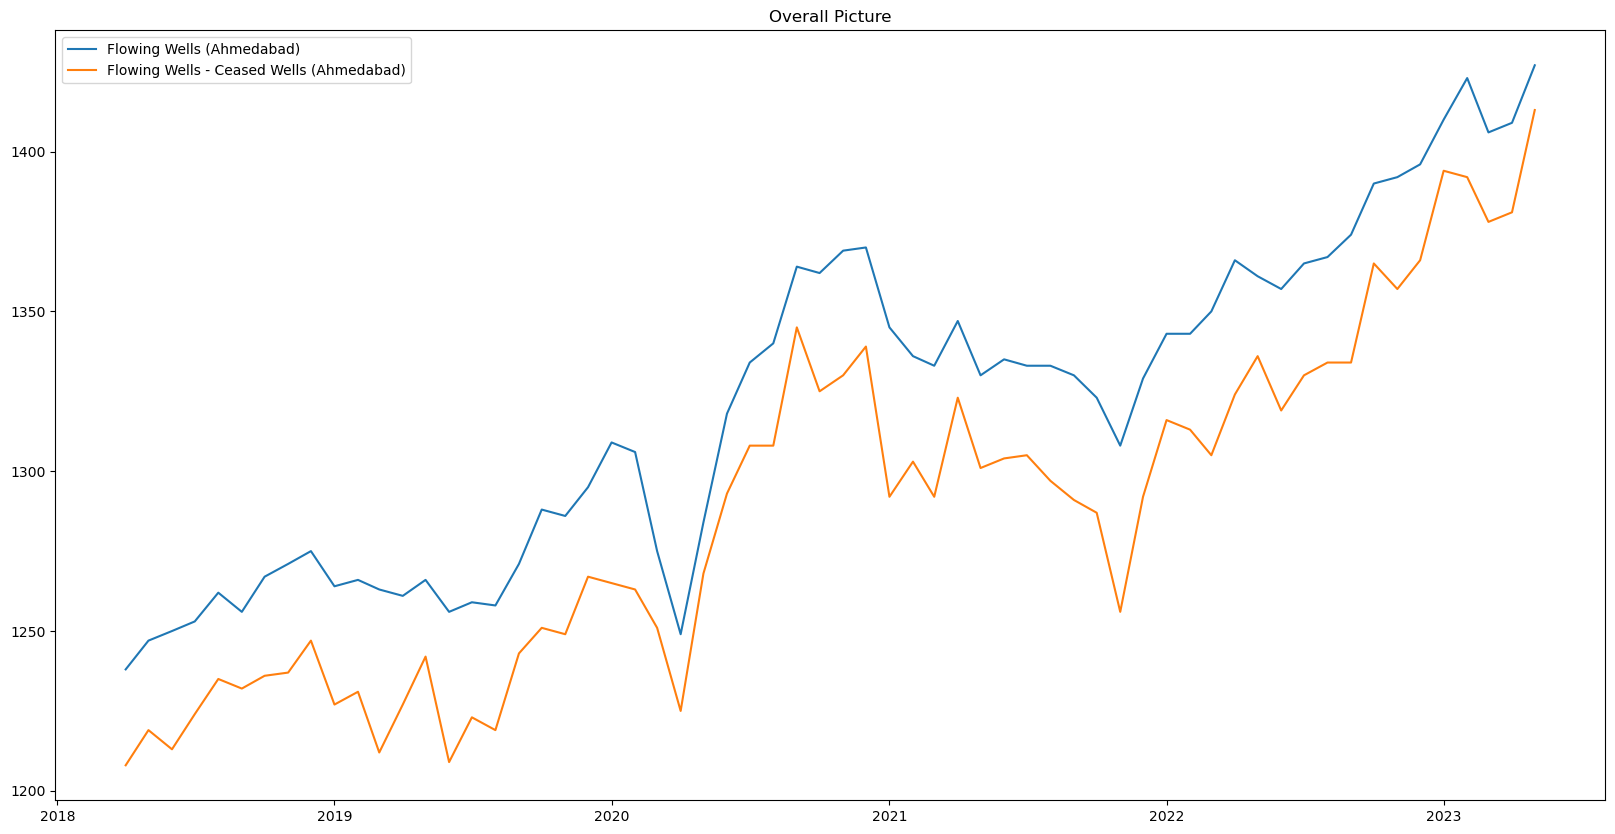

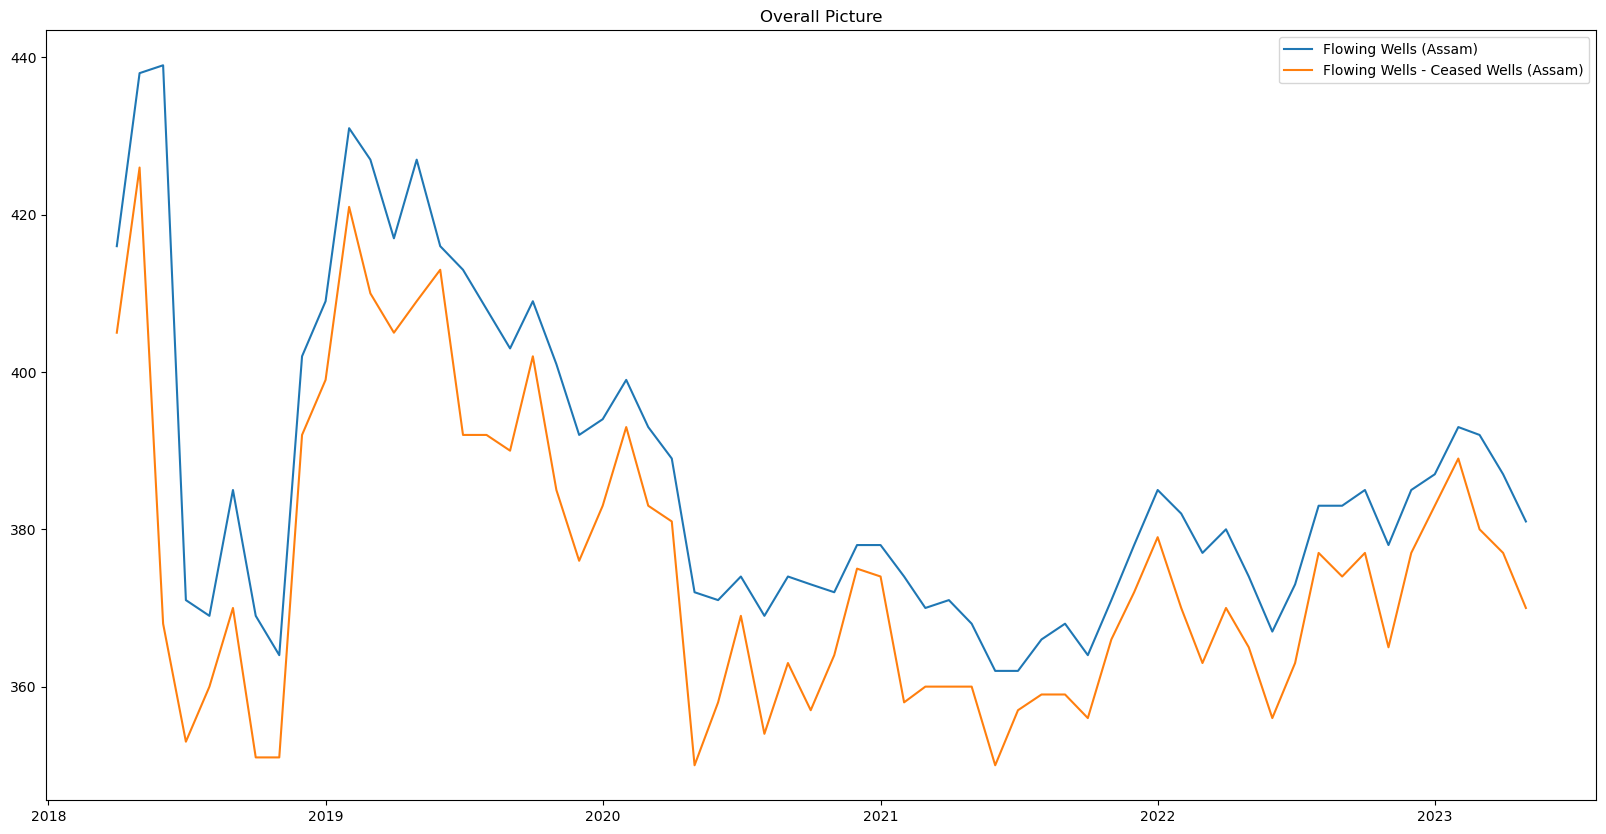

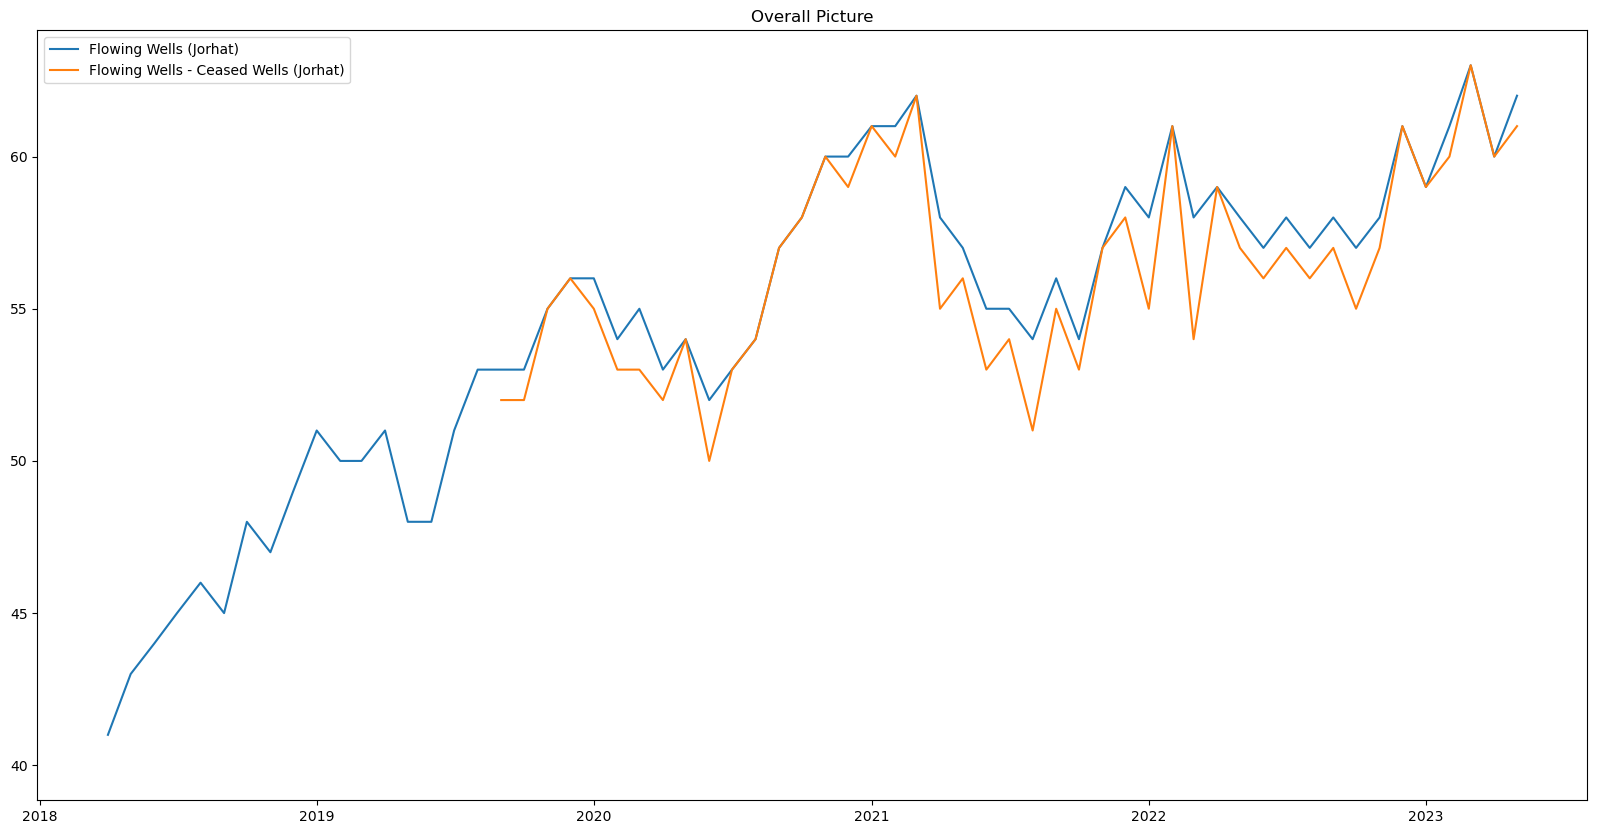

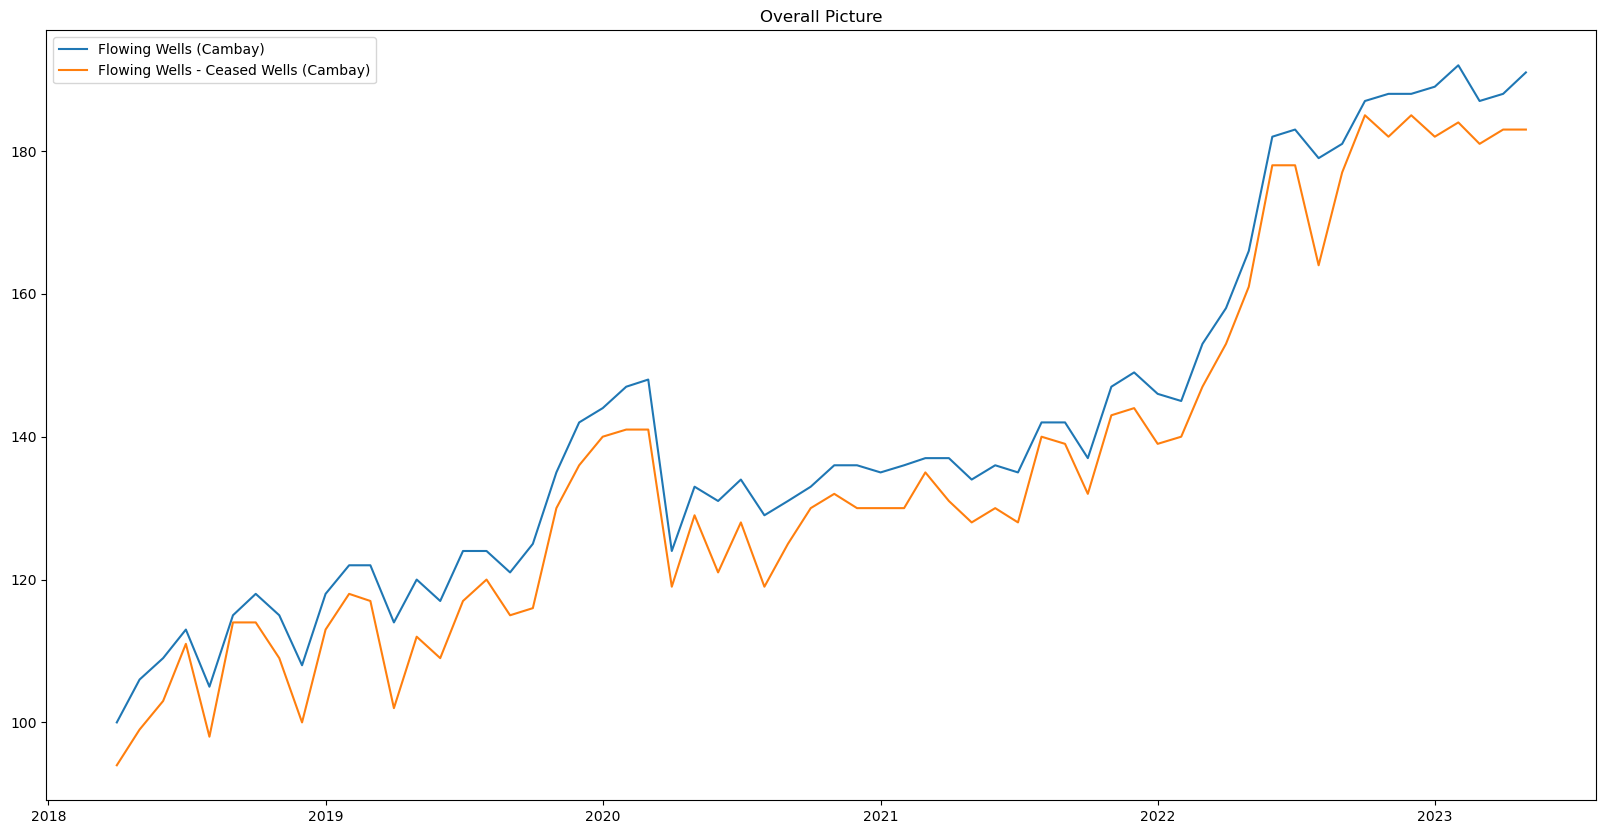

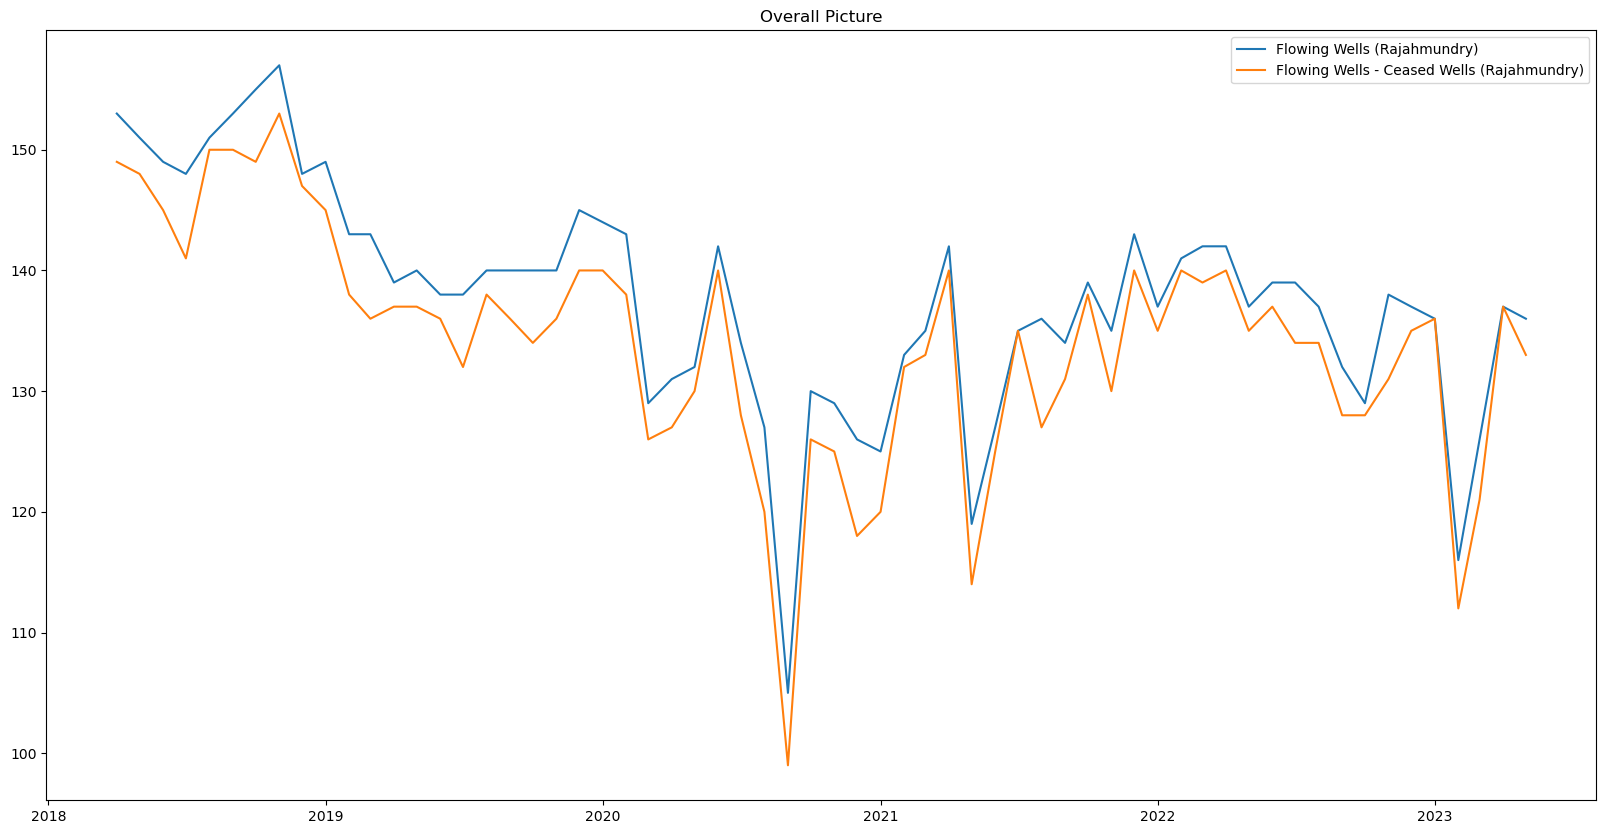

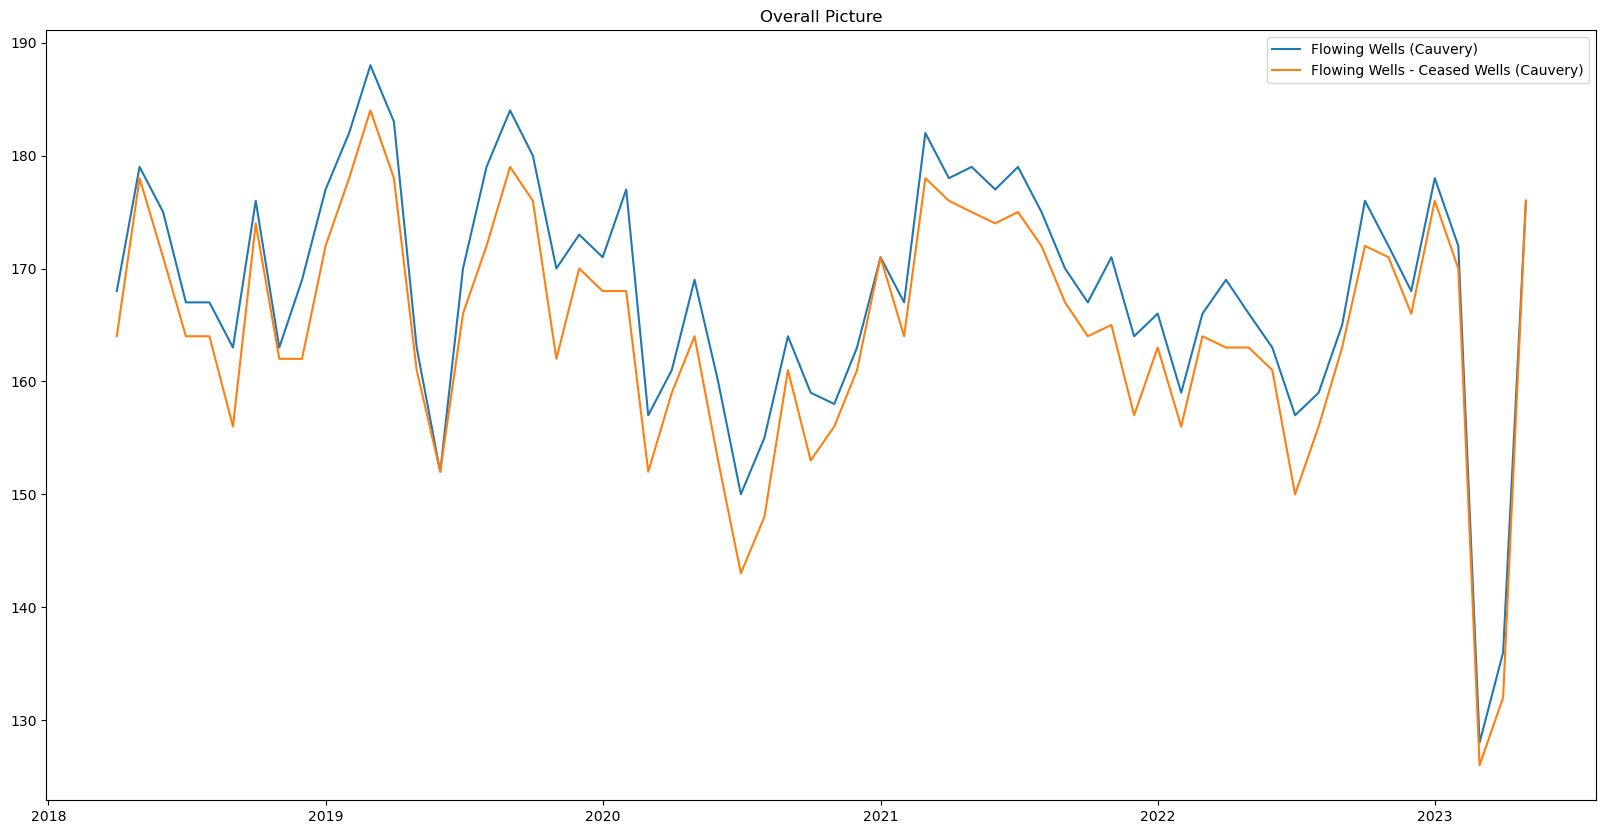

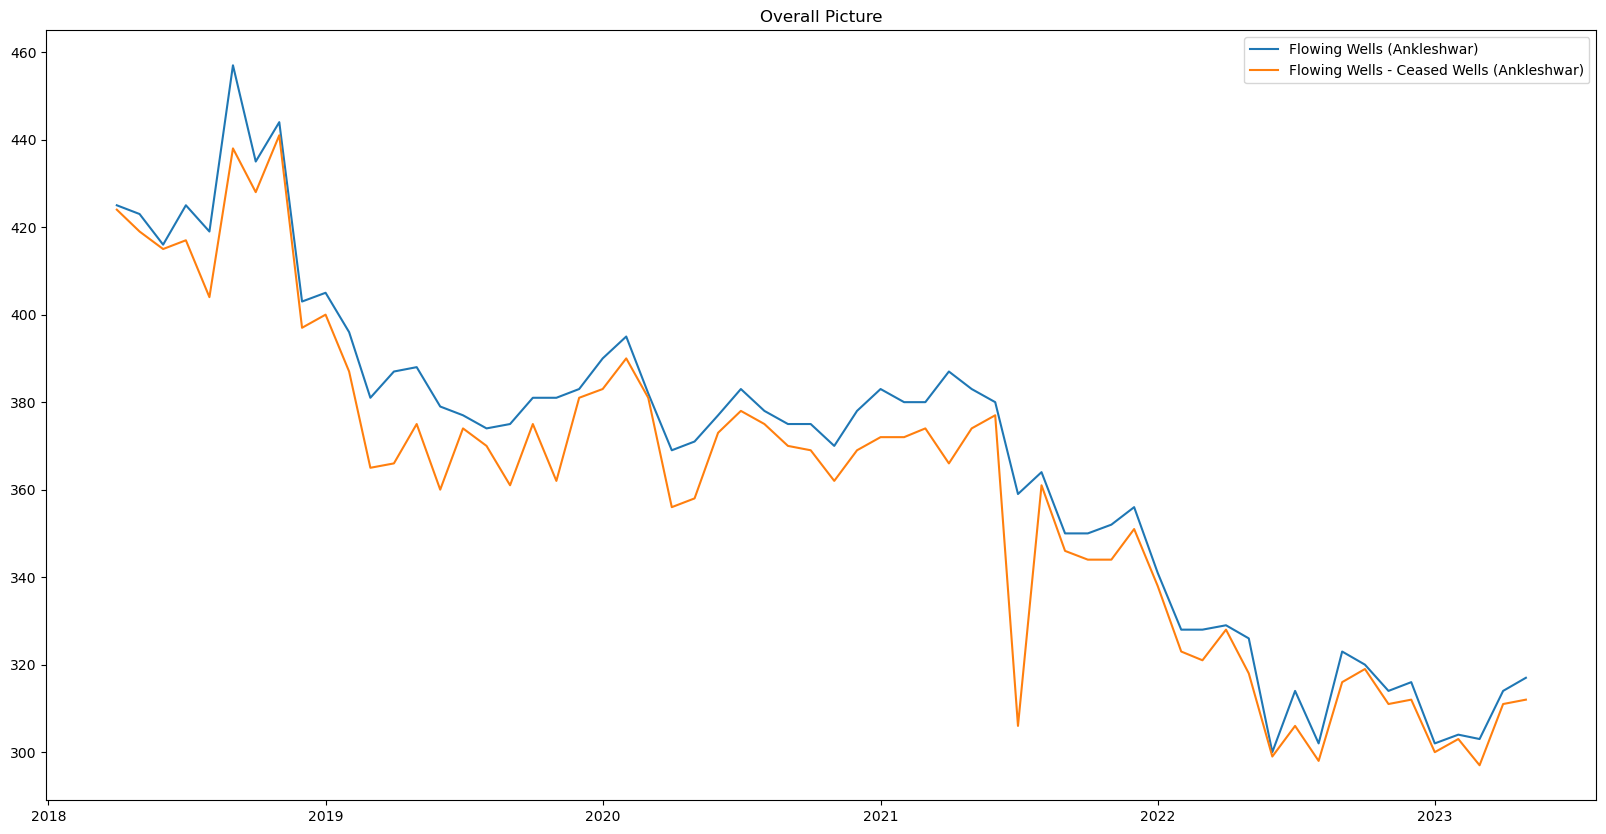

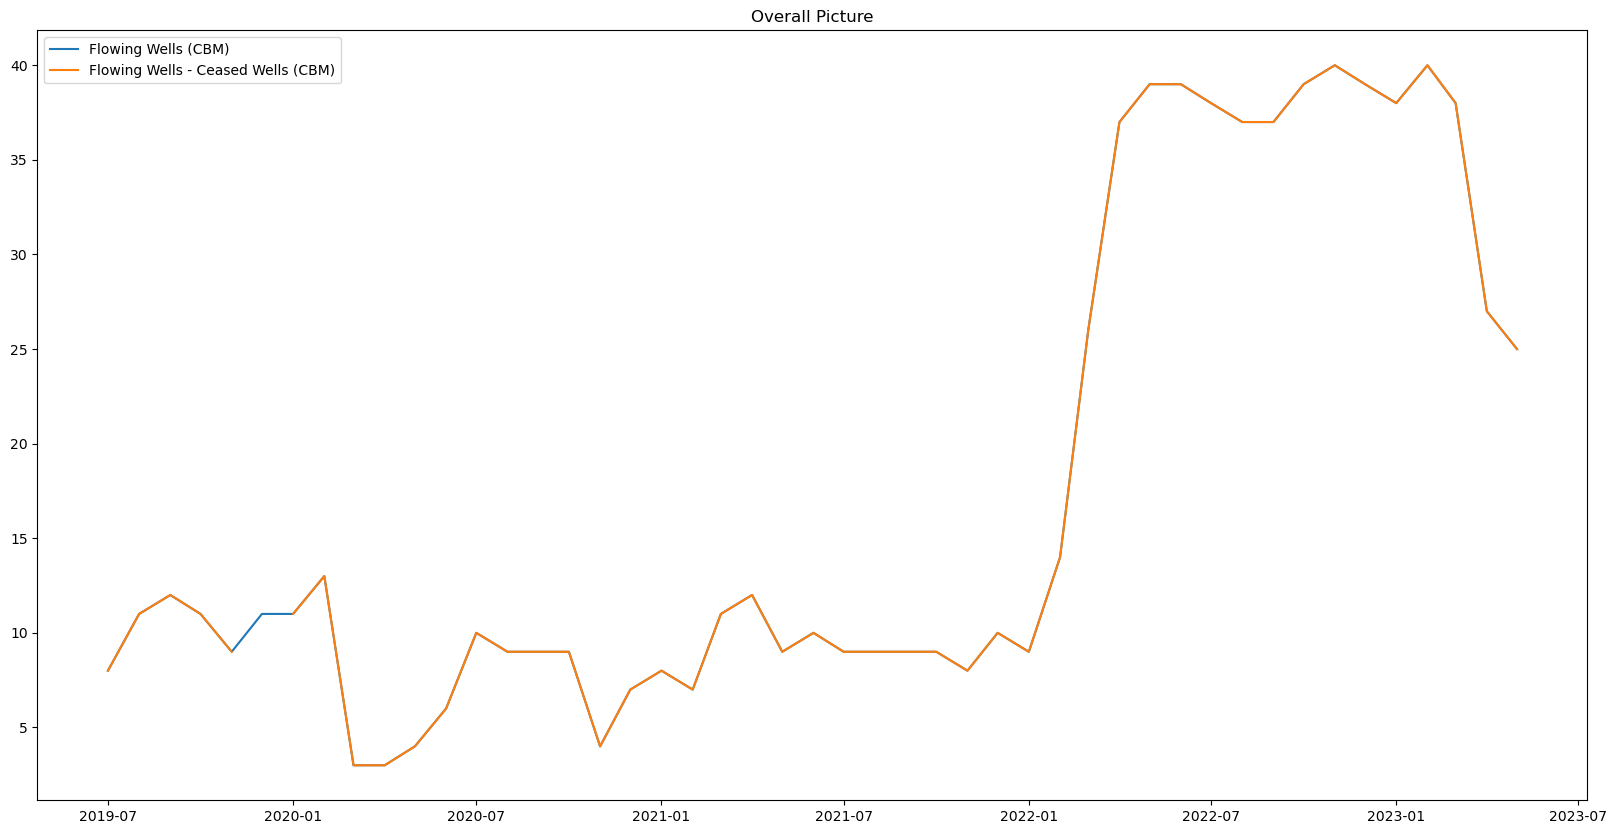

In [147]:
plt.figure(figsize=(20,10))
plot(sub_df.loc[sub_df['Asset'] == "Mehsana"], "Mehsana")

plt.figure(figsize=(20,10))
plot(sub_df.loc[sub_df['Asset'] == "Ahmedabad"], "Ahmedabad")

plt.figure(figsize=(20,10))
plot(sub_df.loc[sub_df['Asset'] == "Assam"], "Assam")

plt.figure(figsize=(20,10))
plot(sub_df.loc[sub_df['Asset'] == "Jorhat"], "Jorhat")

plt.figure(figsize=(20,10))
plot(sub_df.loc[sub_df['Asset'] == "Cambay"], "Cambay")

plt.figure(figsize=(20,10))
plot(sub_df.loc[sub_df['Asset'] == "Tripura"], "Tripura")

plt.figure(figsize=(20,10))
plot(sub_df.loc[sub_df['Asset'] == "Rajahmundry"], "Rajahmundry")

plt.figure(figsize=(20,10))
plot(sub_df.loc[sub_df['Asset'] == "Cauvery"], "Cauvery")

plt.figure(figsize=(20,10))
plot(sub_df.loc[sub_df['Asset'] == "Ankleshwar"], "Ankleshwar")

plt.figure(figsize=(20,10))
plot(sub_df.loc[sub_df['Asset'] == "CBM"], "CBM")

In [158]:
from statsmodels.tsa.stattools import adfuller

In [159]:
FIGSIZE = (10,5)

-----------------------
Checking Stationarity for Ahmedabad
Stationarity       Values                       Metric
0  -5.269151              Test Statistics
1   0.000006                      p-value
2   0.000000             No. of lags used
3  46.000000  Number of observations used
4  -3.581258          critical value (1%)
5  -2.926785          critical value (5%)
6  -2.601541         critical value (10%)
Checking Auto Correlation
One Month Lag:  0.16516943277981594
Three Month Lag:  0.13622064539945164
Six Month Lag:  -0.1948353302701536
Nine Month Lag:  -0.03692506139837463
-----------------------
-----------------------
Checking Stationarity for Mehsana
Stationarity       Values                       Metric
0  -1.580429              Test Statistics
1   0.493417                      p-value
2   6.000000             No. of lags used
3  40.000000  Number of observations used
4  -3.605565          critical value (1%)
5  -2.937069          critical value (5%)
6  -2.606986         critica

/var/folders/5l/tvrvl3dx17g9f755p61ffzs00000gp/T/ipykernel_41513/1669970414.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _df.dropna(inplace=True)
/var/folders/5l/tvrvl3dx17g9f755p61ffzs00000gp/T/ipykernel_41513/1669970414.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _df.dropna(inplace=True)
/var/folders/5l/tvrvl3dx17g9f755p61ffzs00000gp/T/ipykernel_41513/1669970414.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _df.

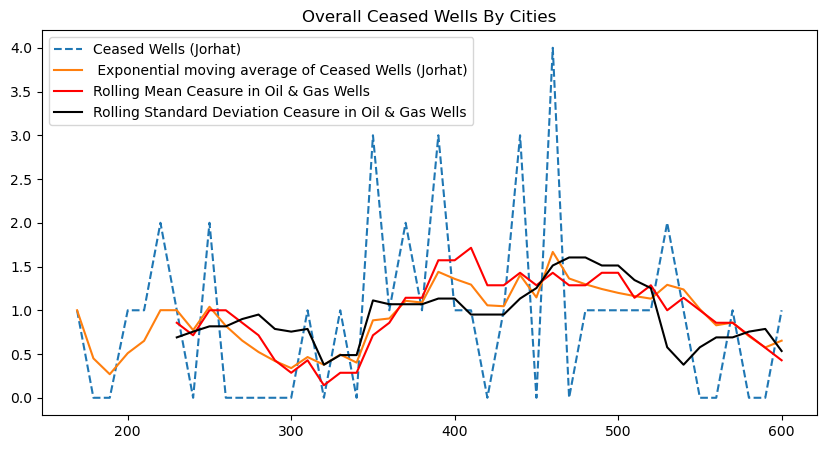

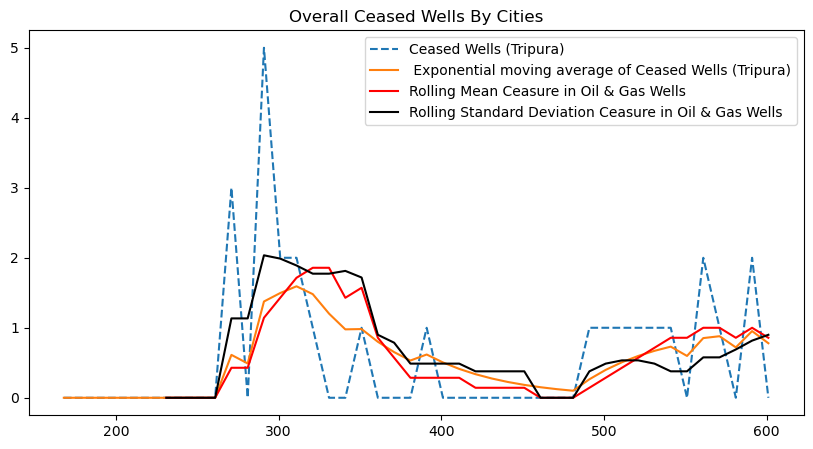

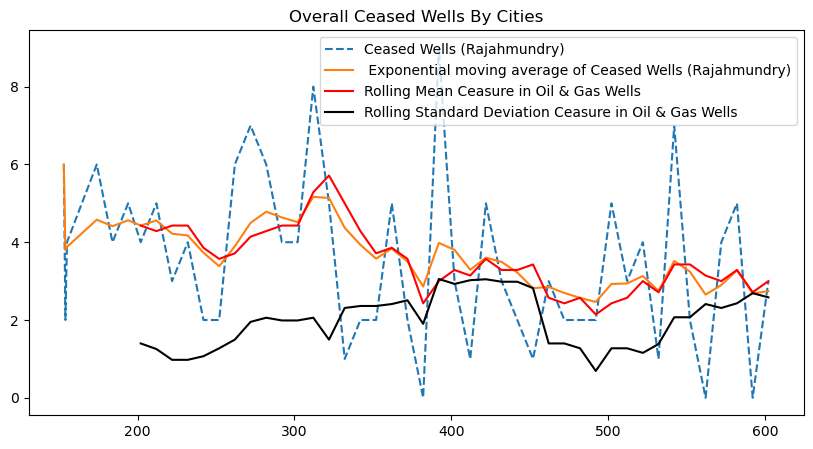

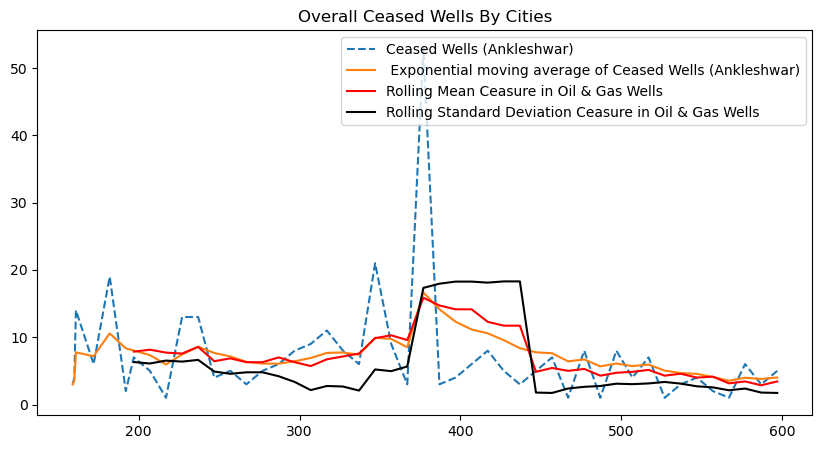

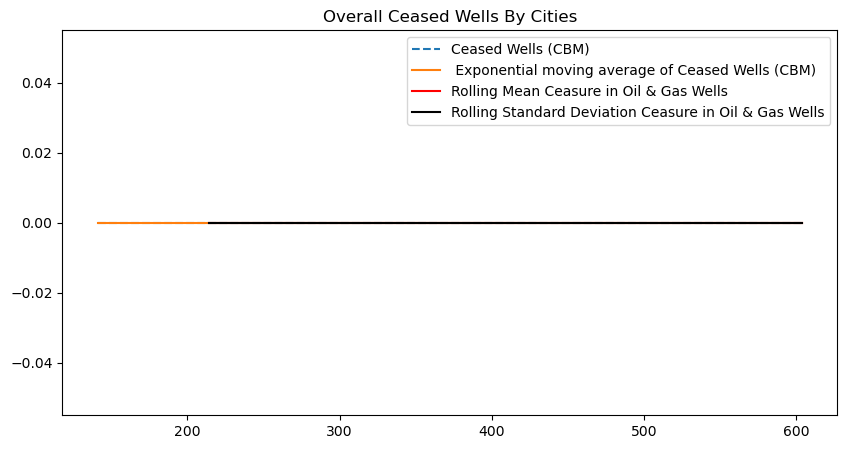

In [161]:
def plot(df, title, running_avergae=10):
    print("-----------------------")
    _df = df[['MONTH', 'CEASURE\n(Oil & Gas Wells)']]
    _df.dropna(inplace=True)
    _df['CEASURE\n(Oil & Gas Wells)'].plot(style = '--', label = 'Ceased Wells ({})'.format(title))
    _df['CEASURE\n(Oil & Gas Wells)'].ewm(span = running_avergae).mean().plot(style = '-', 
                                              label = ' Exponential moving average of Ceased Wells ({})'.format(title))

    print("Checking Stationarity for {}".format(title))
    _df = df[['CEASURE\n(Oil & Gas Wells)']]
    _df.dropna(inplace=True)
    rolling_mean = _df['CEASURE\n(Oil & Gas Wells)'].rolling(7).mean()
    rolling_std = _df['CEASURE\n(Oil & Gas Wells)'].rolling(7).std()
    plt.plot(rolling_mean, color="red", label="Rolling Mean Ceasure in Oil & Gas Wells")
    plt.plot(rolling_std, color="black", label="Rolling Standard Deviation Ceasure in Oil & Gas Wells")
    
    adft = adfuller(_df,autolag="AIC")
    output_df = pd.DataFrame({"Values":[adft[0],adft[1],adft[2],adft[3], adft[4]['1%'], adft[4]['5%'], adft[4]['10%']]  , "Metric":["Test Statistics","p-value","No. of lags used","Number of observations used", 
                                        "critical value (1%)", "critical value (5%)", "critical value (10%)"]})
    print("Stationarity", output_df)

    print("Checking Auto Correlation")
    autocorrelation_lag1 = _df['CEASURE\n(Oil & Gas Wells)'].autocorr(lag=1)
    print("One Month Lag: ", autocorrelation_lag1)
    
    autocorrelation_lag3 = _df['CEASURE\n(Oil & Gas Wells)'].autocorr(lag=3)
    print("Three Month Lag: ", autocorrelation_lag3)

    autocorrelation_lag6 = _df['CEASURE\n(Oil & Gas Wells)'].autocorr(lag=6)
    print("Six Month Lag: ", autocorrelation_lag6)

    autocorrelation_lag9 = _df['CEASURE\n(Oil & Gas Wells)'].autocorr(lag=9)
    print("Nine Month Lag: ", autocorrelation_lag9)
    
    plt.title("Overall Ceased Wells By Cities")
    plt.legend()
    print("-----------------------")

    
    
    
plt.figure(figsize=FIGSIZE)
asset = 'Ahmedabad'
plot(sub_df.loc[sub_df['Asset'] == asset], asset)

plt.figure(figsize=FIGSIZE)
asset = 'Mehsana'
plot(sub_df.loc[sub_df['Asset'] == asset], asset)

plt.figure(figsize=FIGSIZE)
asset = 'Assam'
plot(sub_df.loc[sub_df['Asset'] == asset], asset)

plt.figure(figsize=FIGSIZE)
asset = 'Cambay'
plot(sub_df.loc[sub_df['Asset'] == asset], asset)

plt.figure(figsize=FIGSIZE)
asset = 'Jorhat'
plot(sub_df.loc[sub_df['Asset'] == asset], asset)

plt.figure(figsize=FIGSIZE)
asset = 'Tripura'
plot(sub_df.loc[sub_df['Asset'] == asset], asset)

plt.figure(figsize=FIGSIZE)
asset = 'Rajahmundry'
plot(sub_df.loc[sub_df['Asset'] == asset], asset)

plt.figure(figsize=FIGSIZE)
asset = 'Cauvery'
plot(sub_df.loc[sub_df['Asset'] == asset], asset)

plt.figure(figsize=FIGSIZE)
asset = 'Ankleshwar'
plot(sub_df.loc[sub_df['Asset'] == asset], asset)

plt.figure(figsize=FIGSIZE)
asset = 'CBM'
plot(sub_df.loc[sub_df['Asset'] == asset], asset)

# for asset in sub_df['Asset'].unique():
#     plot(sub_df.loc[sub_df['Asset'] == asset], asset)

In [151]:
# 'Asset' 'MONTH', 'Flowing Wells', 'CEASURE\n(Oil & Gas Wells)', 'WOJ in FWFS wells'
# 'Net Decrease/ Increase in Sick wells'

In [152]:
# convert asset from string to class value
asset_to_class = {
    "Ahmedabad" : 0,
    "Ankleshwar" :1,
    "Assam":2, 
    "CBM":3, 
    "Cambay":4, 
    "Cauvery":5, 
    "Jorhat":6,
    "Mehsana":7,
    "Rajahmundry":8,
    "Tripura":9,
}

def create_feature(sub_df):
    sub_df.dropna(inplace=True)
    asset_feature = []
    time_feature = []
    
    timestamp_to_class = {}

    # convert timestamps from month/year to class value
    cls = 0
    for i in sub_df['MONTH'].unique():
        timestamp_to_class[i] = cls
        cls += 1

    for i in sub_df.index:
        asset_feature.append(asset_to_class[sub_df['Asset'][i]])
        time_feature.append(timestamp_to_class[sub_df['MONTH'][i]])

    asset_feature = np.array(asset_feature).reshape(-1,1)
    time_feature = np.array(time_feature).reshape(-1,1)

    flowing_wells_feature = sub_df.loc[:, 'Flowing Wells']
    flowing_wells_feature = np.array(flowing_wells_feature).reshape(-1,1)

    woj_feature = sub_df.loc[:, 'WOJ in FWFS wells']
    woj_feature = np.array(woj_feature).reshape(-1,1)

    target = sub_df.loc[:, 'CEASURE\n(Oil & Gas Wells)']  # target
    X = np.concatenate([asset_feature, time_feature, flowing_wells_feature, woj_feature], axis=1)
    y = np.array(target).reshape(-1, 1)
    return X, y

In [153]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# creating features and linear and polynomial model. 
X, y = create_feature(sub_df)

t = PolynomialFeatures(degree=10, include_bias=False)
x_ = t.fit_transform(X)
print("shapes", x_.shape, X.shape, y.shape)

# X, y = create_feature(am_df)
model = LinearRegression().fit(X, y)
polynomial_model = LinearRegression().fit(x_, y)

shapes (463, 1000) (463, 4) (463, 1)


/var/folders/5l/tvrvl3dx17g9f755p61ffzs00000gp/T/ipykernel_41513/1141158483.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df.dropna(inplace=True)


In [154]:
asset = "Ahmedabad"
am_df = sub_df.loc[sub_df['Asset'] == asset]

asset = "Assam"
as_df = sub_df.loc[sub_df['Asset'] == asset]

asset = "Mehsana"
me_df = sub_df.loc[sub_df['Asset'] == asset]

asset = "Tripura"
tr_df = sub_df.loc[sub_df['Asset'] == asset]

asset = "Rajahmundry"
ra_df = sub_df.loc[sub_df['Asset'] == asset]

asset = "Cauvery"
ca_df = sub_df.loc[sub_df['Asset'] == asset]

asset = "CBM"
cb_df = sub_df.loc[sub_df['Asset'] == asset]

asset = "Ankleshwar"
an_df = sub_df.loc[sub_df['Asset'] == asset]

asset = "Cambay"
cm_df = sub_df.loc[sub_df['Asset'] == asset]

asset = "Jorhat"
jo_df = sub_df.loc[sub_df['Asset'] == asset]



coefficient of determination for Ahmedabad: 0.06700755884430942
coefficient of determination for Assam: -0.14408376610635032
coefficient of determination for Mehsana: 0.2593852859598895
coefficient of determination for Rajahmundry: -0.41653953435772406
coefficient of determination for Cauvery: -0.09069398562959385
coefficient of determination for Cambay: -0.24869079466778388
coefficient of determination for Jorhat: -0.07051572857377386
coefficient of determination for Ankleshwar: -0.07051572857377386
coefficient of determination for Cambay: -0.07051572857377386
coefficient of determination for Tripura: -0.07051572857377386


/var/folders/5l/tvrvl3dx17g9f755p61ffzs00000gp/T/ipykernel_41513/1141158483.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df.dropna(inplace=True)


Text(0.5, 1.0, 'Linear Regression Fit Analysis for Tripura ')

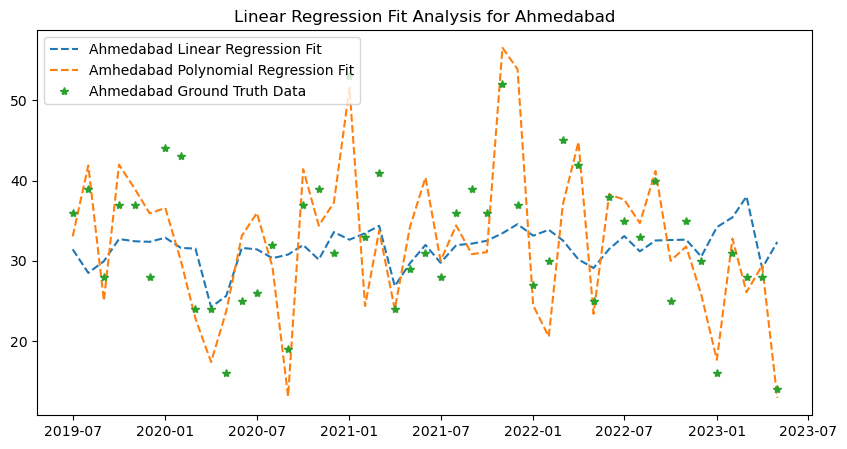

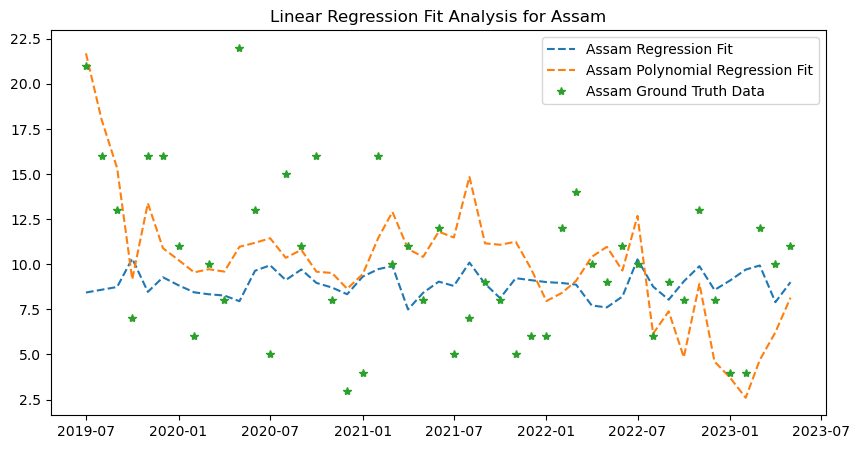

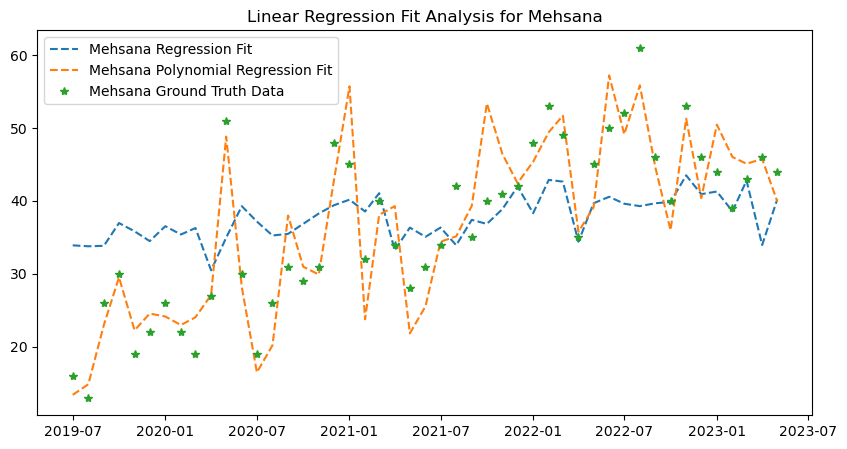

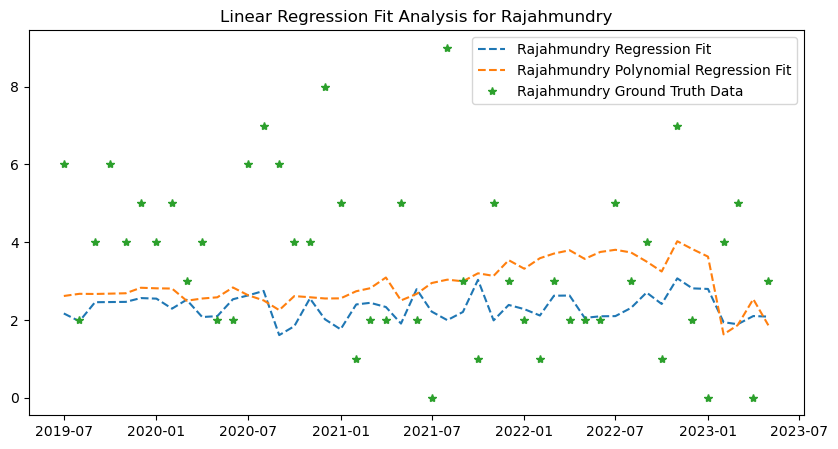

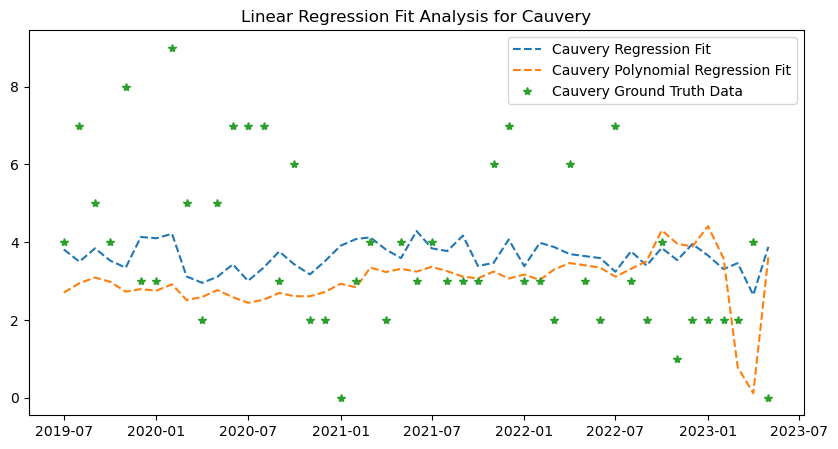

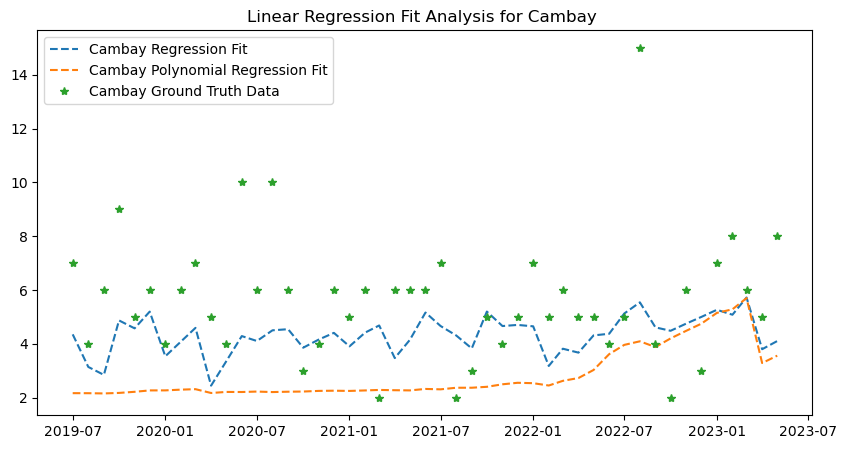

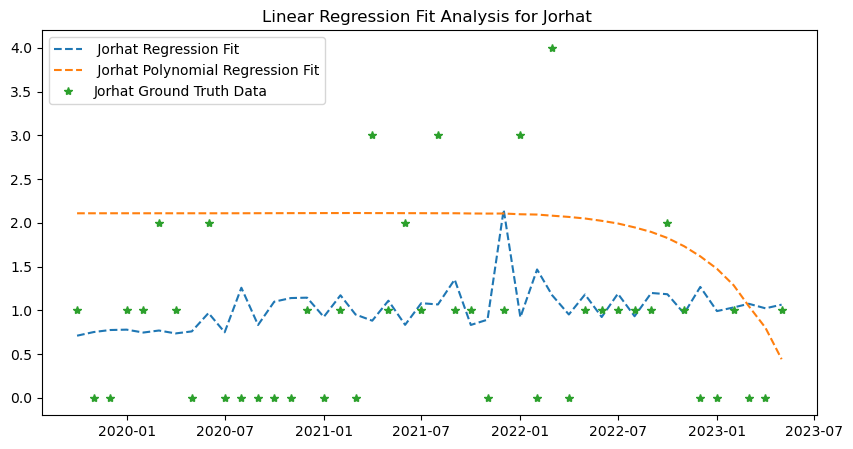

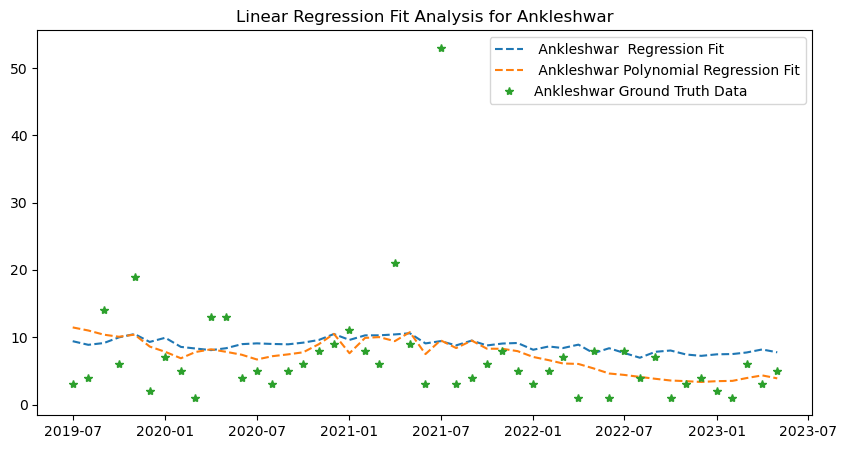

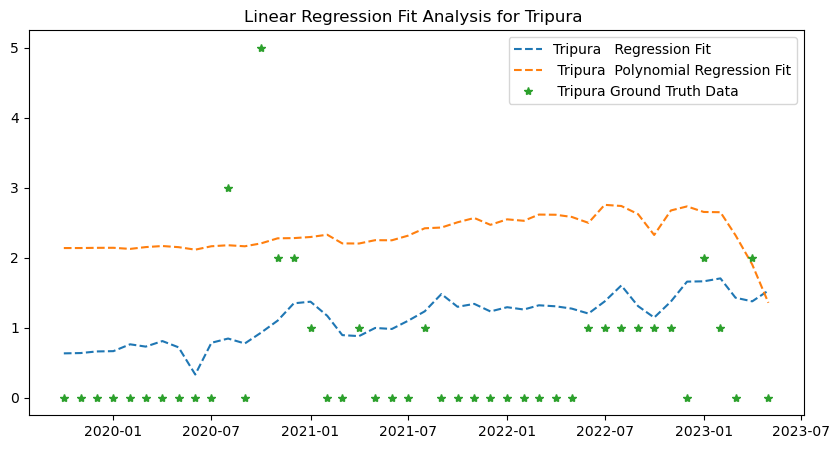

In [157]:
am_X, am_y = create_feature(am_df)
as_X, as_y = create_feature(as_df)
me_X, me_y = create_feature(me_df)
ra_X, ra_y = create_feature(ra_df)
ca_X, ca_y = create_feature(ca_df)
cm_X, cm_y = create_feature(cm_df)
jo_X, jo_y = create_feature(jo_df)
an_X, an_y = create_feature(an_df)
cb_X, cb_y = create_feature(cb_df)
tr_X, tr_y = create_feature(tr_df)



am_y_pred = model.predict(am_X) #, index=X.index)
r_sq = model.score(am_X, am_y)
print(f"coefficient of determination for Ahmedabad: {r_sq}")

as_y_pred = model.predict(as_X) #, index=X.index)
r_sq = model.score(as_X, as_y)
print(f"coefficient of determination for Assam: {r_sq}")

me_y_pred = model.predict(me_X) #, index=X.index)
r_sq = model.score(me_X, me_y)
print(f"coefficient of determination for Mehsana: {r_sq}")

ra_y_pred = model.predict(ra_X) #, index=X.index)
r_sq = model.score(ra_X, ra_y)
print(f"coefficient of determination for Rajahmundry: {r_sq}")

ca_y_pred = model.predict(ca_X) #, index=X.index)
r_sq = model.score(ca_X, ca_y)
print(f"coefficient of determination for Cauvery: {r_sq}")

cm_y_pred = model.predict(cm_X) #, index=X.index)
r_sq = model.score(cm_X, cm_y)
print(f"coefficient of determination for Cambay: {r_sq}")

jo_y_pred = model.predict(jo_X) #, index=X.index)
r_sq = model.score(jo_X, jo_y)
print(f"coefficient of determination for Jorhat: {r_sq}")

an_y_pred = model.predict(an_X) #, index=X.index)
r_sq = model.score(jo_X, jo_y)
print(f"coefficient of determination for Ankleshwar: {r_sq}")

cb_y_pred = model.predict(cb_X) #, index=X.index)
r_sq = model.score(jo_X, jo_y)
print(f"coefficient of determination for Cambay: {r_sq}")

tr_y_pred = model.predict(tr_X) #, index=X.index)
r_sq = model.score(jo_X, jo_y)
print(f"coefficient of determination for Tripura: {r_sq}")

# polynomials model prediction
am_y_poly_pred = polynomial_model.predict(t.fit_transform(am_X)) #, index=X.index)
as_y_poly_pred = polynomial_model.predict(t.fit_transform(as_X)) #, index=X.index)
me_y_poly_pred = polynomial_model.predict(t.fit_transform(me_X)) #, index=X.index)
ra_y_poly_pred = polynomial_model.predict(t.fit_transform(ra_X)) #, index=X.index)
ca_y_poly_pred = polynomial_model.predict(t.fit_transform(ca_X)) #, index=X.index)
cm_y_poly_pred = polynomial_model.predict(t.fit_transform(cm_X)) #, index=X.index)
jo_y_poly_pred = polynomial_model.predict(t.fit_transform(jo_X)) #, index=X.index)
an_y_poly_pred = polynomial_model.predict(t.fit_transform(an_X)) #, index=X.index)
cb_y_poly_pred = polynomial_model.predict(t.fit_transform(cb_X)) #, index=X.index)
tr_y_poly_pred = polynomial_model.predict(t.fit_transform(tr_X)) #, index=X.index)


plt.figure(figsize=FIGSIZE)
plt.plot(am_df['MONTH'], am_y_pred,'--', label="Ahmedabad Linear Regression Fit")
plt.plot(am_df['MONTH'], am_y_poly_pred,'--', label="Amhedabad Polynomial Regression Fit")
plt.plot(am_df['MONTH'], am_y, '*', label="Ahmedabad Ground Truth Data")
plt.legend()
plt.title("Linear Regression Fit Analysis for Ahmedabad")

plt.figure(figsize=FIGSIZE)
plt.plot(as_df['MONTH'], as_y_pred,'--', label="Assam Regression Fit")
plt.plot(as_df['MONTH'], as_y_poly_pred,'--', label="Assam Polynomial Regression Fit")
plt.plot(as_df['MONTH'], as_y, '*', label="Assam Ground Truth Data")
plt.legend()
plt.title("Linear Regression Fit Analysis for Assam")

plt.figure(figsize=FIGSIZE)
plt.plot(me_df['MONTH'], me_y_pred,'--', label="Mehsana Regression Fit")
plt.plot(me_df['MONTH'], me_y_poly_pred,'--', label="Mehsana Polynomial Regression Fit")
plt.plot(me_df['MONTH'], me_y, '*', label="Mehsana Ground Truth Data")
plt.legend()
plt.title("Linear Regression Fit Analysis for Mehsana")

plt.figure(figsize=FIGSIZE)
plt.plot(ra_df['MONTH'], ra_y_pred,'--', label="Rajahmundry Regression Fit")
plt.plot(ra_df['MONTH'], ra_y_poly_pred,'--', label="Rajahmundry Polynomial Regression Fit")
plt.plot(ra_df['MONTH'], ra_y, '*', label="Rajahmundry Ground Truth Data")
plt.legend()
plt.title("Linear Regression Fit Analysis for Rajahmundry")

plt.figure(figsize=FIGSIZE)
plt.plot(ca_df['MONTH'], ca_y_pred,'--', label="Cauvery Regression Fit")
plt.plot(ca_df['MONTH'], ca_y_poly_pred,'--', label="Cauvery Polynomial Regression Fit")
plt.plot(ca_df['MONTH'], ca_y, '*', label="Cauvery Ground Truth Data")
plt.legend()
plt.title("Linear Regression Fit Analysis for Cauvery")

plt.figure(figsize=FIGSIZE)
plt.plot(cm_df['MONTH'], cm_y_pred,'--', label="Cambay Regression Fit")
plt.plot(cm_df['MONTH'], cm_y_poly_pred,'--', label="Cambay Polynomial Regression Fit")
plt.plot(cm_df['MONTH'], cm_y, '*', label="Cambay Ground Truth Data")
plt.legend()
plt.title("Linear Regression Fit Analysis for Cambay ")

plt.figure(figsize=FIGSIZE)
plt.plot(jo_df['MONTH'], jo_y_pred,'--', label=" Jorhat Regression Fit")
plt.plot(jo_df['MONTH'], jo_y_poly_pred,'--', label=" Jorhat Polynomial Regression Fit")
plt.plot(jo_df['MONTH'], jo_y, '*', label="Jorhat Ground Truth Data")
plt.legend()
plt.title("Linear Regression Fit Analysis for Jorhat ")

plt.figure(figsize=FIGSIZE)
plt.plot(an_df['MONTH'], an_y_pred,'--', label=" Ankleshwar  Regression Fit")
plt.plot(an_df['MONTH'], an_y_poly_pred,'--', label=" Ankleshwar Polynomial Regression Fit")
plt.plot(an_df['MONTH'], an_y, '*', label="Ankleshwar Ground Truth Data")
plt.legend()
plt.title("Linear Regression Fit Analysis for Ankleshwar")


plt.figure(figsize=FIGSIZE)
plt.plot(cb_df['MONTH'], cb_y_pred,'--', label=" CBM  Regression Fit")
plt.plot(cb_df['MONTH'], cb_y_poly_pred,'--', label="  CBM Polynomial Regression Fit")
plt.plot(cb_df['MONTH'], cb_y, '*', label="CBM Ground Truth Data")
plt.legend()
plt.title("Linear Regression Fit Analysis for CBM ")


plt.figure(figsize=FIGSIZE)
plt.plot(tr_df['MONTH'], tr_y_pred,'--', label="Tripura   Regression Fit")
plt.plot(tr_df['MONTH'], tr_y_poly_pred,'--', label=" Tripura  Polynomial Regression Fit")
plt.plot(tr_df['MONTH'], tr_y, '*', label=" Tripura Ground Truth Data")
plt.legend()
plt.title("Linear Regression Fit Analysis for Tripura ")

In [85]:
x = np.linspace(0, 5, 20).reshape(-1, 1)
y = 3*x**2
y = np.exp(x)

mm = LinearRegression().fit(x.reshape(-1, 1), y.reshape(-1, 1))

# polynomial
p = PolynomialFeatures(degree=4, include_bias=False)

mm2 = LinearRegression().fit(p.fit_transform(x), y.reshape(-1, 1))

x = np.linspace(0, 7, 20).reshape(-1, 1)
plt.plot(x, y, '*')
plt.plot(x, mm.predict(x))
plt.plot(x, mm2.predict(p.fit_transform(x)))

In [58]:
sub_df

Asset                MONTH  Flowing Wells  \
138    Ahmedabad  2019-07-01 00:00:00           1259   
139    Ahmedabad  2019-08-01 00:00:00           1258   
140    Ahmedabad  2019-09-01 00:00:00           1271   
141          CBM  2019-07-01 00:00:00              8   
142          CBM  2019-08-01 00:00:00             11   
..           ...                  ...            ...   
600       Jorhat  2023-05-01 00:00:00             62   
601      Tripura  2023-05-01 00:00:00            104   
602  Rajahmundry  2023-05-01 00:00:00            136   
603      Cauvery  2023-05-01 00:00:00            176   
604          CBM  2023-05-01 00:00:00             25   

     CEASURE\n(Oil & Gas Wells)  WOJ in FWFS wells  \
138                        36.0               29.0   
139                        39.0               17.0   
140                        28.0               22.0   
141                         0.0                3.0   
142                         0.0                1.0   
..                          ...                ...   
600                         1.0                0.0   
601                         0.0                1.0   
602                         3.0                0.0   
603                         0.0                2.0   
604                         0.0                2.0   

     Net Decrease/ Increase in Sick wells  
138                                     0  
139                                    -9  
140                                     8  
141                                     3  
142                                     1  
..                                    ...  
600                                    -1  
601                                     1  
602                                    -3  
603                                     4  
604                                     2  

[463 rows x 6 columns]

In [120]:
df_2 = df[['MONTH', "CEASURE (Oil & Gas Wells"]]

KeyError: "['CEASURE (Oil & Gas Wells'] not in index"

In [12]:
from sklearn.metrics import r2_score
